In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
sns.set_theme(font_scale=1.5, style = 'whitegrid', context= 'notebook')
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os

my_cmap = LinearSegmentedColormap.from_list('my_cmap', ["#00000000", "#3f37c9", "#c44536"], N = 100)
my_cmap
#oadeji01
os.chdir('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\Raman_Bunmi\\20250424')

<>:16: SyntaxWarning: invalid escape sequence '\R'
<>:16: SyntaxWarning: invalid escape sequence '\R'
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_16552\3621841658.py:16: SyntaxWarning: invalid escape sequence '\R'
  os.chdir('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\Raman_Bunmi\\20250424')


## Import and process raw data (text file)

In [3]:
files = []
for file in os.listdir():
    #print(file)
    if file.endswith('.txt'):#and 'p' in file: 
        #print(file)
        with open(file, 'r') as txt_files:

            print(txt_files)
            files.append(txt_files.read().split(' '))

<_io.TextIOWrapper name='0_5rf_control_pbs_05.txt' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='0_5rf_control_rf_02.txt' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='0_5rf_treated_12mins_01.txt' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='0_5rf_treated_17mins_02.txt' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='0_5rf_treated_22mins_01.txt' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='0_5rf_treated_27mins_01.txt' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='0_5rf_treated_2mins_02.txt' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='0_5rf_treated_7mins_01.txt' mode='r' encoding='cp1252'>


In [3]:
data = []
for id, f in enumerate(files):
    
    spectra = [x.strip().split() for x in f][-1]
    spectra = [spectra[i:i + 1025] for i in range(0, len(spectra), 1025)]
    #print(f)
    #print(len(spectra))
    row_name = [x.strip().split() for x in f][39][6]
    #print(row_name)
    col_name = spectra[0]
    sp_num = [int(x) for x in range(1, len(spectra))]
    #df = pd.DataFrame(spectra[1:], columns=spectra[0]).iloc[:, 1:]
    #data.append([spectra, sp_num, row_name, col_name])
    dff = pd.DataFrame(spectra[1:], columns=col_name).iloc[:, 1:].astype(float)
        #print(data[id][1])
    dff.insert(0, 'sample', row_name)
    dff.insert(1, 'spectra_num', sp_num)
    data.append(dff)


In [84]:
df = pd.concat(data, ignore_index=True)
df['sample'] = df['sample'].str.replace("0_", "0.", regex = False)
deets = df['sample'].str.split('_', expand = True).rename(columns= {0:'sample', 1: 'RiboConc', 2: 'Trt'})
deets1 = deets.fillna('Control')
df = pd.concat([deets1, df.iloc[:, 1:]], axis=1)
#df.insert(3, 'pre/post', np.where(df['Trt'].str.contains('post'), 'post', 'pre'))'''
df.head()

,sample,RiboConc,Trt,spectra_num,114.269,117.336,120.4,123.463,126.525,129.584,...,2580.58,2582.49,2584.4,2586.31,2588.22,2590.12,2592.03,2593.93,2595.84,2597.74
0,0.5rf,control,pbs,1,3077.34,2766.15,2999.41,3010.90,2842.59,2603.96,...,63.6033,65.2931,67.1064,68.7925,69.9313,71.1261,72.2149,74.2149,73.9143,70.2182
1,0.5rf,control,pbs,2,7161.63,6907.37,6681.09,6466.67,6215.43,6008.99,...,51.4454,53.9222,56.7818,59.9771,63.3600,66.9035,70.4324,72.9924,68.6721,65.7728
2,0.5rf,control,pbs,3,5369.34,5000.11,5090.23,5130.21,4718.05,4366.60,...,64.6710,66.9032,68.7519,70.7900,72.2829,73.5038,72.8105,72.4046,71.1618,66.7798
3,0.5rf,control,pbs,4,1439.34,1025.60,1639.17,1816.15,1602.53,1311.74,...,156.1390,161.5510,167.8850,174.5300,181.7900,188.4120,194.5900,199.9070,204.2240,207.1560
4,0.5rf,control,pbs,5,2737.64,2611.96,2503.15,2393.95,2307.33,2232.62,...,36.4468,38.3704,40.5952,43.2047,46.1668,49.9096,51.1792,51.8299,52.3284,50.8143


### Save processed data

In [85]:
df.to_csv('20250214.csv')

### Import .csv files for analyses

In [5]:
dff = pd.concat([pd.read_csv('..\\20250317\\20250317_edited.csv'), pd.read_csv('20250320.csv')])

In [3]:
df = pd.read_csv('20250424.csv')
df.head()

,sample,trt_time,orient,753.561,754.704,755.847,756.99,758.132,759.274,760.416,...,1770.1,1770.96,1771.83,1772.7,1773.57,1774.43,1775.3,1776.16,1777.03,1777.9
0,Ctrl,20mins,Orth,5.22266,26.3071,45.8997,58.3212,71.8474,75.2584,74.5990,...,3.21451,4.46753,5.34412,6.71933,8.13110,9.93201,12.05650,14.1535,15.30410,14.0869
1,Ctrl,20mins,Orth,9.44995,17.0090,20.4492,23.4138,26.2690,28.4037,29.1624,...,2.56741,3.43353,4.47714,6.09045,7.96399,9.97455,12.49980,15.0557,17.47840,17.8524
2,Ctrl,20mins,Orth,1.86682,22.9994,37.8617,51.3240,60.4094,63.8414,66.3596,...,10.68260,9.66550,8.25916,6.75089,5.17688,4.16827,4.51648,5.4549,7.99088,14.0232
3,Ctrl,20mins,Orth,3.92700,18.4133,31.0176,40.5225,47.3422,52.8932,58.0665,...,10.78680,12.13700,13.46660,13.99800,14.49830,14.74200,14.79420,14.8234,14.75910,14.5653
4,Ctrl,20mins,Orth,1.11108,22.0710,40.5745,56.1453,68.3851,77.3657,83.4553,...,5.73962,7.40973,9.63989,12.28370,15.25270,18.51000,21.76260,24.8219,27.44770,29.1717


In [6]:
df.iloc[:, 600:700].columns

Index(['1385.78', '1386.76', '1387.74', '1388.71', '1389.69', '1390.66',
       '1391.64', '1392.61', '1393.59', '1394.56', '1395.54', '1396.51',
       '1397.48', '1398.46', '1399.43', '1400.4', '1401.37', '1402.35',
       '1403.32', '1404.29', '1405.26', '1406.23', '1407.2', '1408.17',
       '1409.14', '1410.11', '1411.08', '1412.05', '1413.02', '1413.99',
       '1414.96', '1415.93', '1416.9', '1417.87', '1418.83', '1419.8',
       '1420.77', '1421.73', '1422.7', '1423.67', '1424.63', '1425.6',
       '1426.56', '1427.53', '1428.49', '1429.46', '1430.42', '1431.39',
       '1432.35', '1433.32', '1434.28', '1435.24', '1436.2', '1437.17',
       '1438.13', '1439.09', '1440.05', '1441.02', '1441.98', '1442.94',
       '1443.9', '1444.86', '1445.82', '1446.78', '1447.74', '1448.7',
       '1449.66', '1450.62', '1451.57', '1452.53', '1453.49', '1454.45',
       '1455.41', '1456.36', '1457.32', '1458.28', '1459.23', '1460.19',
       '1461.15', '1462.1', '1463.06', '1464.01', '1464.97',

In [4]:
# Normalize data to a specific wavelength
norm = df.iloc[:, 3:].div(df['1455.41'], axis=0)#dt.iloc[:, 5:].sum(axis=1)
dt_norm = pd.concat([df.iloc[:, :3], norm], axis=1)
#dt_norm

### Subtract Riboflavin signal from the treatments

In [5]:
df_sam = dt_norm.melt(id_vars=['sample','trt_time', 'orient'])#
#[dt['sample'] == 'Micetail_Ribo0.5_pre']
df_sam[["variable", "value"]] = df_sam[["variable", "value"]].astype('float64')
df_sam.head()

,sample,trt_time,orient,variable,value
0,Ctrl,20mins,Orth,753.561,0.023339
1,Ctrl,20mins,Orth,753.561,0.038454
2,Ctrl,20mins,Orth,753.561,0.004308
3,Ctrl,20mins,Orth,753.561,0.013106
4,Ctrl,20mins,Orth,753.561,0.002185


TypeError: Axes.boxplot() got an unexpected keyword argument 'gap'

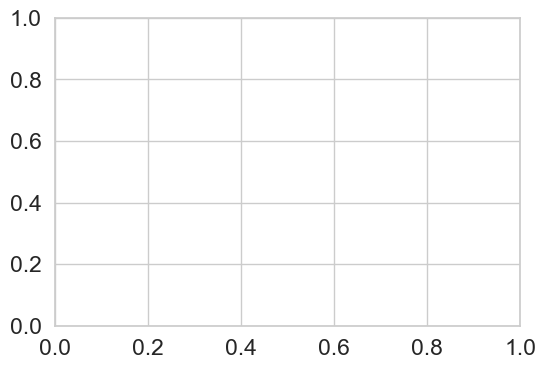

In [19]:
# Plot to show peak intensity at specified wavelengths between the control and treated samples.

for col in [734.494, 805.9, 860.224, 927.4, 1001.69, 1226.32, 1254.07, 1454.05, 1630.26, 1655.95]:
    plt.figure(figsize = (6, 4));
    sns.boxplot(
        data = df_sam[(df_sam['variable'] == col)], #& (df_sam['value'] > -5)
        #([734.494, 805.9, 860.224, 927.4, 1001.69, 1226.32, 1254.07, 1454.05, 1630.26, 1655.95])],
        x = 'group',
        y = 'value',
        hue = 'Trt',
        hue_order=['pbs','rf', '2mins', '7mins','12mins', '17mins', '22mins','27mins',  '32mins'],
        order=['control', 'treated'],
        #palette={'solid': 'blue', 'empty': 'none'}
        width= .7,
        gap = .4
    );
    #plt.ylim(0, 3)
    plt.xlabel('');
    plt.ylabel('Relative Intensity (a.u.)')
    plt.legend(bbox_to_anchor = (1.2, 1), fontsize = 16);#[], [], 
    plt.xticks(fontsize = 16, rotation = 30);
    plt.title(f'Peak: {col}/cm');

    '''sns.stripplot(
        data = df_sam[df_sam['variable'] == col],#([734.494, 805.9, 860.224, 927.4, 1001.69, 1226.32, 1254.07, 1454.05, 1630.26, 1655.95])],
        x = 'trt',
        y = 'value',
        hue = 'Trt',
        hue_order=['control1','trt2mins', 'trt7mins','trt12mins', 'trt17mins', 'trt22mins','trt27mins',  'trt32mins'],
        marker = 'D',
        jitter = True,
        dodge = True,
        edgecolor = 'gray',
        linewidth = 1
    );'''
    

In [20]:
#Test for equal variances
for v in [734.494, 805.9, 860.224, 927.4, 1001.69, 1226.32, 1254.07, 1454.05, 1630.26, 1655.95]:
    t_stat, p_val = stats.levene(
        df_sam[(df_sam['variable'] == v) & (df_sam['group'] == 'control') & (df_sam['Trt'] != 'pbs')]['value'], 
        df_sam[(df_sam['variable'] == v) & (df_sam['group'] == 'treated') & (df_sam['Trt'] != 'pbs')]['value'],
        center = 'mean')
    print(f"p-value ({v}): ", p_val)

p-value (734.494):  0.0027421500091064175
p-value (805.9):  0.005592636937059502
p-value (860.224):  0.004236039143949786
p-value (927.4):  0.0008848181324450714
p-value (1001.69):  0.0028441609570224917
p-value (1226.32):  0.8321578267431007
p-value (1254.07):  0.9724557043891429
p-value (1454.05):  0.009561207614058612
p-value (1630.26):  0.3769400947450404
p-value (1655.95):  0.7517358413295887


In [21]:
#test for comparing means
for v in [734.494, 805.9, 860.224, 927.4, 1001.69, 1226.32, 1254.07, 1454.05, 1630.26, 1655.95]:
    t_stat, p_val = stats.ttest_ind(
        df_sam[(df_sam['variable'] == v) & (df_sam['group'] == 'control') & (df_sam['Trt'] != 'pbs')]['value'], 
        df_sam[(df_sam['variable'] == v) & (df_sam['group'] == 'treated') & (df_sam['Trt'] != 'pbs')]['value'],
        #equal_var=False
        )
    print(f"p-value ({v}): ", p_val)

p-value (734.494):  2.5591201865492436e-06
p-value (805.9):  3.5088399987426543e-11
p-value (860.224):  3.7295012737093457e-07
p-value (927.4):  3.6475338778198594e-07
p-value (1001.69):  9.522307276243811e-08
p-value (1226.32):  0.0021717379643569072
p-value (1254.07):  1.831509768359856e-05
p-value (1454.05):  0.32702034055278284
p-value (1630.26):  0.008523911992007076
p-value (1655.95):  0.014464054576654312


## Plot the spectra as a time series
#### Modify dataframe
* Create a sample DataFrame df with columns for Wavelength, Intensity, and Group.
* Define the offset for each group in the group_offsets dictionary.
* Create a new DataFrame df_sam_spectra by copying the original DataFrame.
* Use a loop to add the specified offset to the Intensity values of each group.

In [7]:
# create offsets for each treatment group, exept the pbs
group_offsets = {
    #'Orth': 0.0,
    #'Para': 1,
    '20mins': 2,
    '40mins': 3,
    '40mins': 4,
}
#'22mins': .3,
#    '27mins': .3,
 #   '32mins': .3
#make a copy of the dataframe
df_sam_spectra = df_sam.copy()
# add the defined offset value for each group
for group, offset in group_offsets.items():
    df_sam_spectra.loc[df_sam_spectra['orient']== group, 'value'] += offset


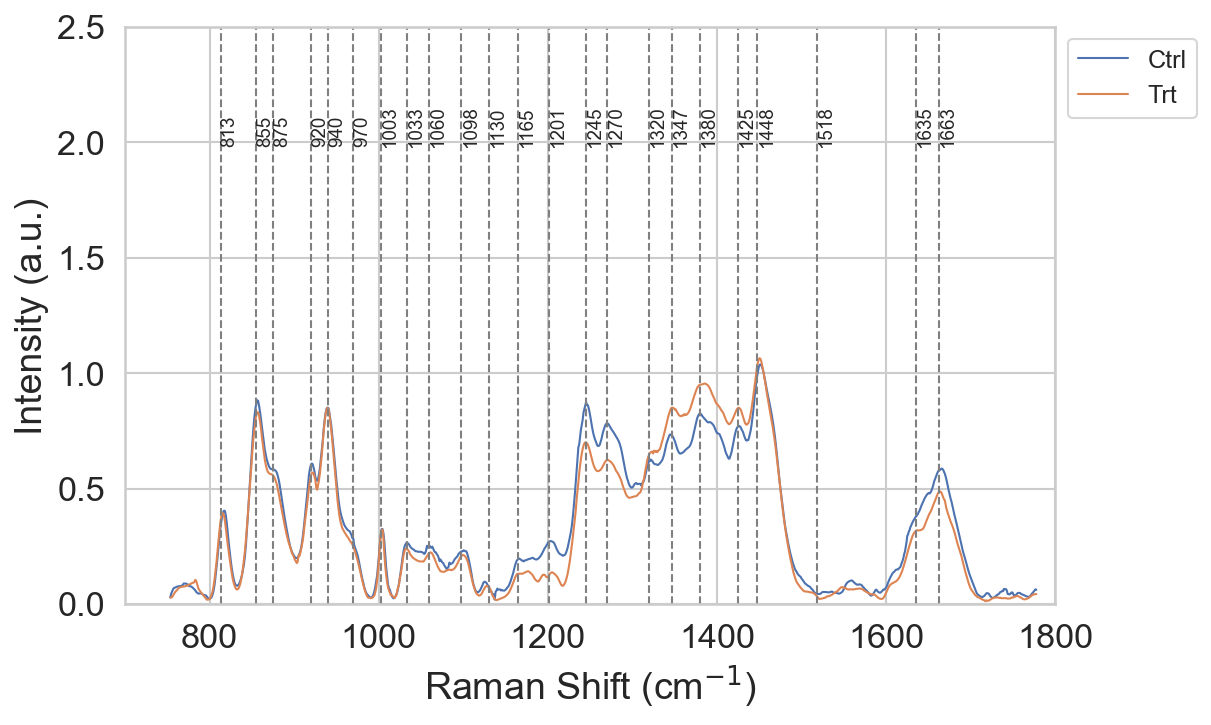

In [87]:
# Create the plot using seaborn
plt.figure(figsize=(8, 5), dpi = 150);
sns.lineplot(
    data = df_sam_spectra[(df_sam_spectra['trt_time'].str.contains('60m')) & (df_sam_spectra['orient'] == 'Para')],# 
    x='variable', 
    y='value', 
    hue='sample', 
    errorbar=None, 
    #style='sample', 
    #hue_order=['Orth', 'Para'],
    #legend = False,
    lw = 1
);
'''sns.lineplot(
    data = df_sam_spectra[(df_sam_spectra['trt_time'].str.contains('60m')) & (df_sam_spectra['orient'] == 'Para')  & (df_sam_spectra['sample'] == 'Ctrl')],
    x='variable', 
    y='value', 
    #hue='sample', 
    errorbar=None, 
    color = 'maroon',
    #style='sample', 
    #hue_order=['Orth', 'Para'],
    legend = False,
    lw = 1
);'''
# Set the x-axis limit
plt.xlim(700, 1800);
plt.ylim(0, 2.5)
#plt.title("60mins Treated RF Fiber Samples")

# Add labels and title
plt.xlabel("Raman Shift (cm$^{-1}$)");
plt.ylabel('Intensity (a.u.)');
#lt.title('Stacked Spectral Data with Continuous Y-Axis Ticks and Subgroups')
plt.legend(bbox_to_anchor = (1, 1), fontsize= 12);
plt.xticks([800, 1000,  1200, 1400, 1600, 1800]);
for v in [813, 855, 875, 920, 940, 970, 1003,1033, 1060, 1098, 1130, 
          1165, 1201, 1245, 1270, 1320, 1347, 1380, 1425, 1448, 1518, 1635, 1663]:
    plt.axvline(v, color = 'gray', ls = '--', lw = 1)
    if v in [1242,1630]:
        plt.text(v - .5, 2, rotation = 90, fontsize = 9, s = f'{v}', horizontalalignment='right')
    else:
        plt.text(v+0.08, 2, rotation = 90, fontsize = 9, s = f'{v}')
    


In [73]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()
#[dt_norm['orient'] == 'Orth']
scaled_data = data_scaler.fit_transform(dt_norm[dt_norm['orient'] == 'Orth'].iloc[:, 3:])
scaled_data.shape

(70, 1024)

In [74]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

complete_clustering = linkage(scaled_data, method="complete", metric="cityblock")
average_clustering = linkage(scaled_data, method="average", metric="cityblock")#dt_norm[dt_norm['orient'] == 'Para'].iloc[:, 3:]
single_clustering = linkage(scaled_data, method="single", metric="cityblock")

In [75]:
cluster_labels = fcluster(average_clustering, t=4, criterion='maxclust')
len(cluster_labels)

70

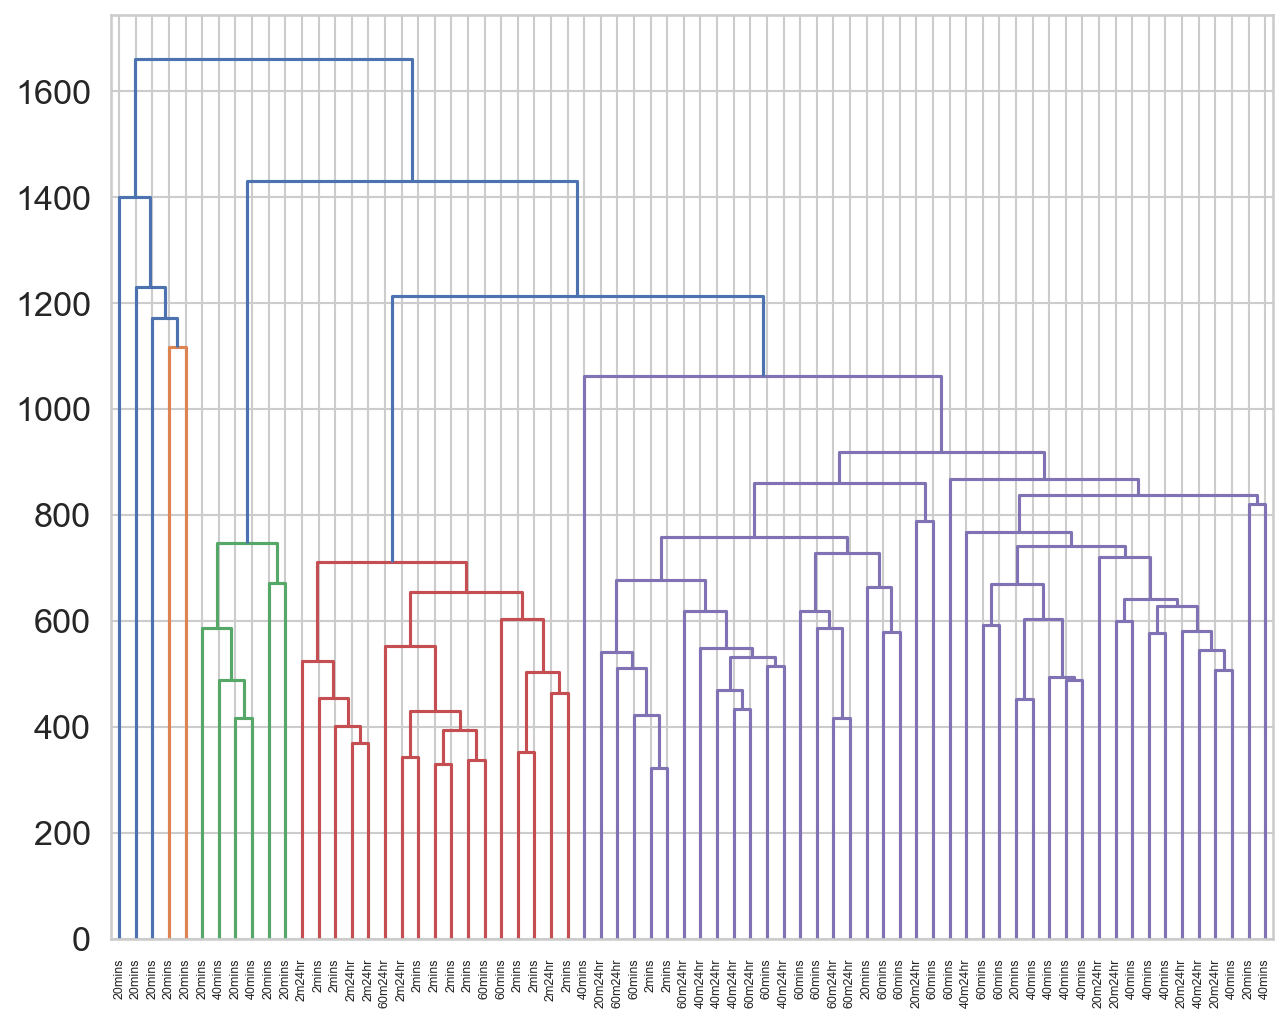

In [78]:
plt.figure(figsize = (10, 8), dpi = 150)
dendrogram(average_clustering, 
           labels=[x for x in dt_norm[dt_norm['orient'] == 'Orth']['trt_time']])
#[x for x in dt_norm['sample']],[dt_norm['orient'] == 'Orth']
plt.show()

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
#[dt_norm['orient'] == 'Orth']
pc_df = pd.DataFrame(pca.fit_transform(scaled_data), columns = [f'PC{i}' for i in range(1, 6)])
pc_df =pd.concat([dt_norm[dt_norm['orient'] == 'Orth'].iloc[:, :3].reset_index(drop=True), pc_df], axis=1)


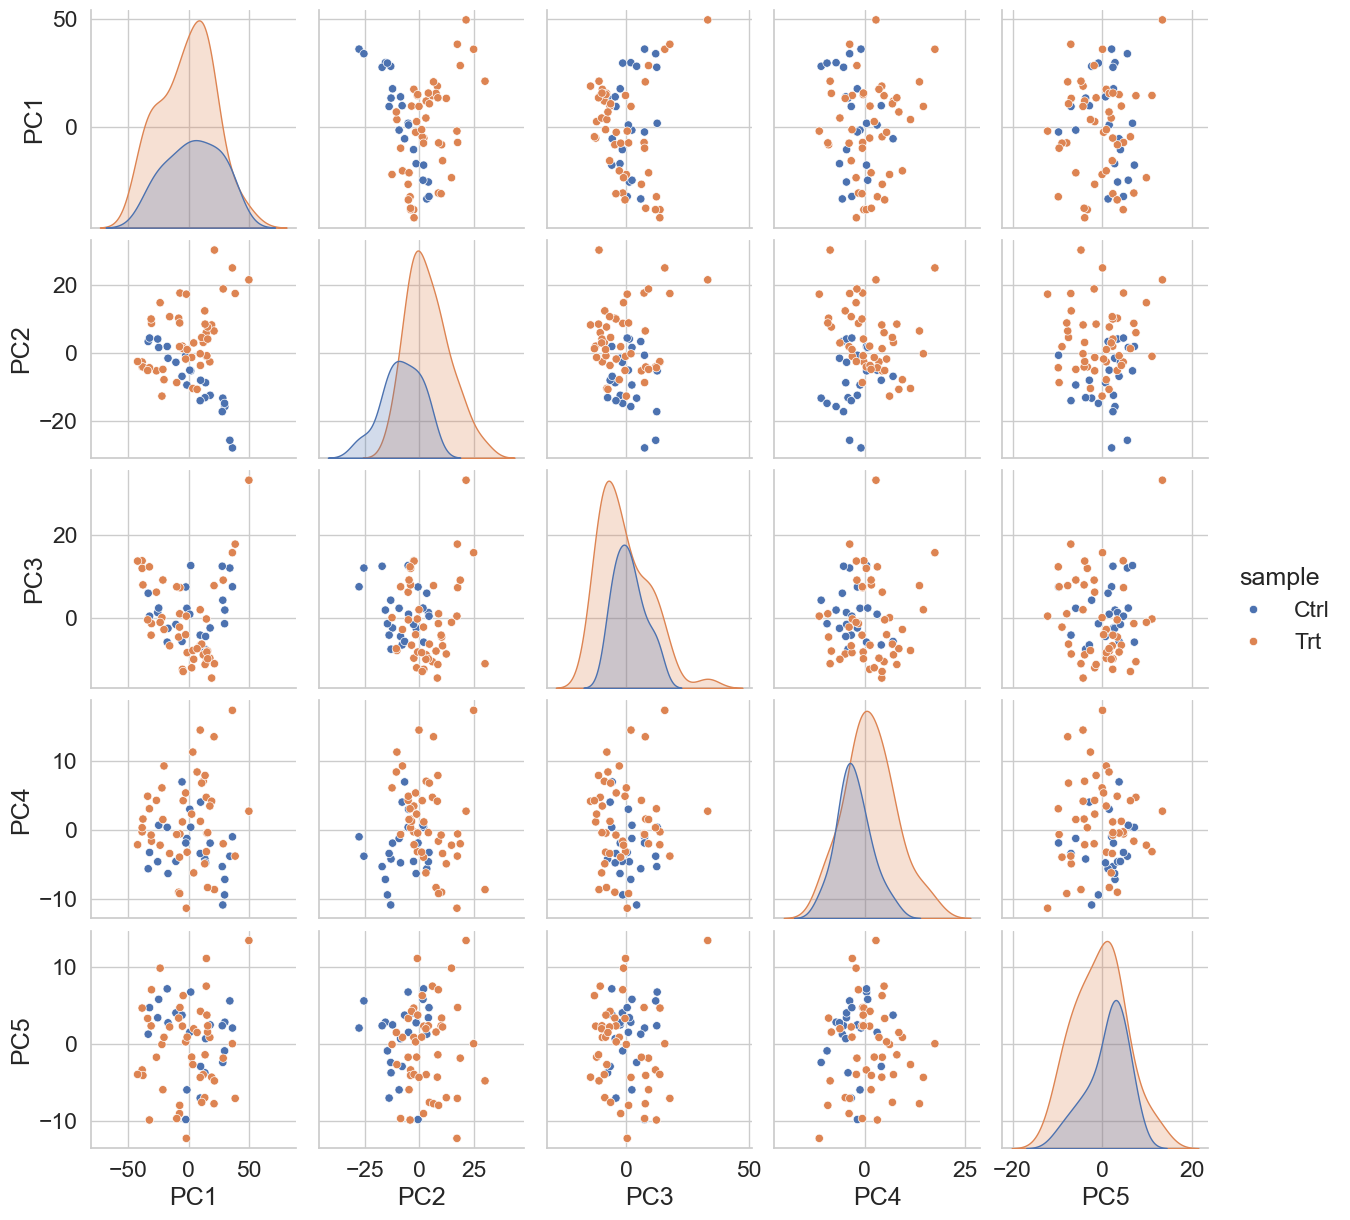

In [54]:
sns.pairplot(pc_df, hue = 'sample');

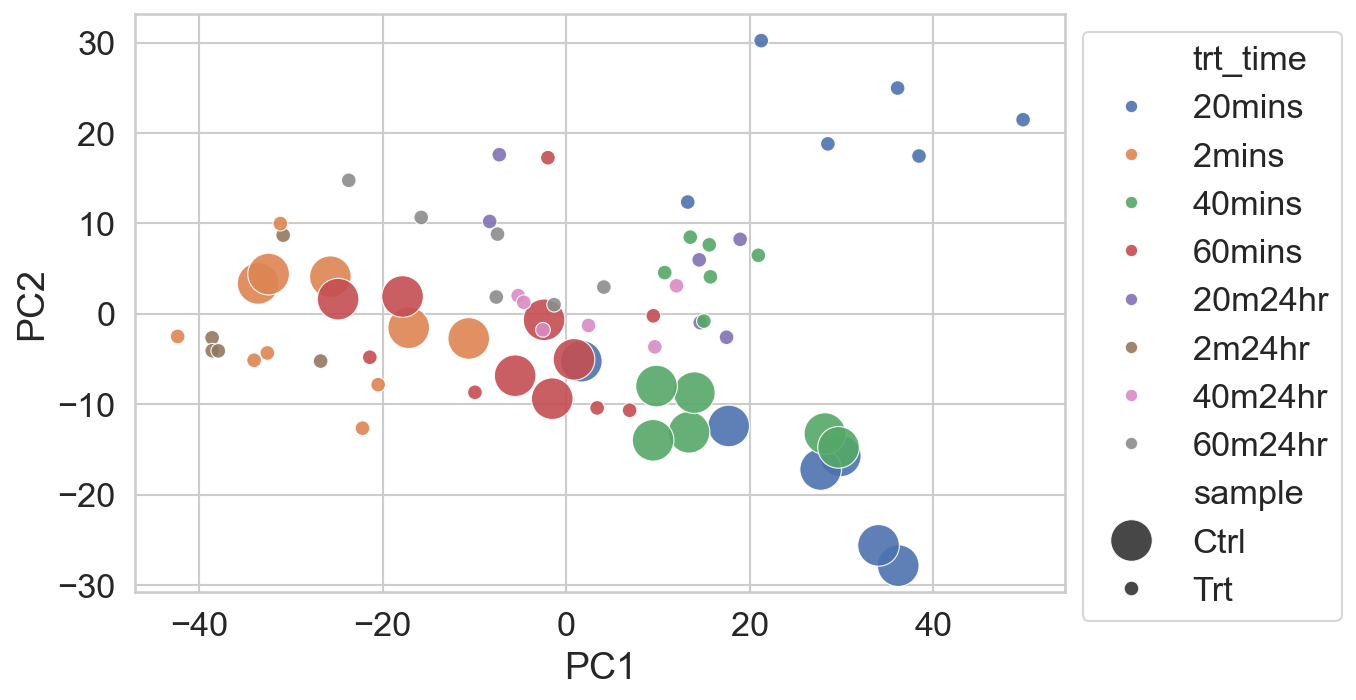

In [56]:
plt.figure(figsize=(8, 5), dpi = 150);
sns.scatterplot(
    data = pc_df,
    x = 'PC1',
    y = 'PC2',
    hue = 'trt_time',
    size="sample",
    sizes=(50, 400),
    alpha = .9
)
plt.legend(bbox_to_anchor = (1,1))

** Deep dive into the differences between peaks at specified wavelengths, to also view shifts in the peaks.

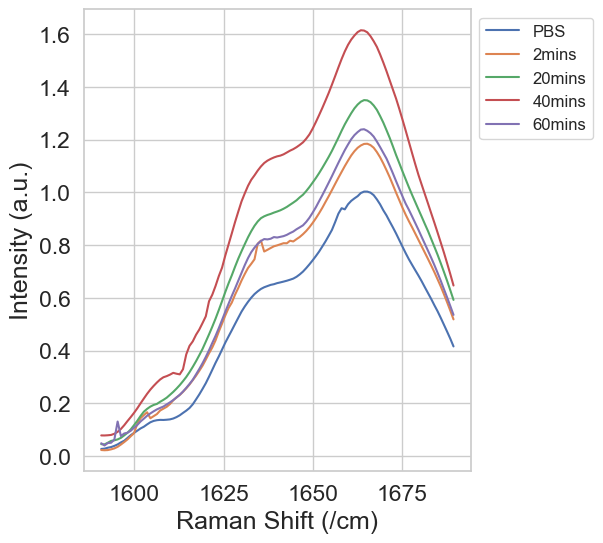

In [50]:
plt.figure(figsize = (5, 6))
sns.lineplot(
        data = df_sam[df_sam['variable'].between(1590, 1690)], #[df_sam[''].isin(['32mins', 'control']) == False], #[df_sam[''].str.contains('NP')], #& (df_sam['pre/post'] == 'post')
        #() & df_sam[''].isin(['Polarized','PolarizedRinsed'])
        #'P_Rinsed', 'NP_Rinsed', 'P_Unrinsed', 'NP_Unrinsed', 'P', 'NP'
        x = 'variable',
        y = 'value',
        hue = 'RiboConc',
        hue_order=['PBS', '2mins', '20mins', '40mins', '60mins'],#
        #style='RiboConc',
        #label = 'Xlinked_1%',
        #linestyle = '--',
        #ax = ax1,
        errorbar=None
        );
#plt.xlim(1600, 1700)
#plt.ylim(0.5, 2500)
#plt.title(' 0.50% RF Treated Samples')
plt.ylabel('Intensity (a.u.)')
plt.xlabel('Raman Shift (/cm)')
plt.legend(bbox_to_anchor = (1, 1), fontsize = 12)
#plt.axvline(1630, ls = '--', color = 'maroon')
#plt.axvline(1660, ls = '--', color = 'maroon')
#plt.axvline(927, ls = '--', color = 'maroon')

## Calculate and plot the difference between the Control and Treated Samples

In [56]:
#exclude the Control (PBS) group
dtn_mean = dt_norm[(dt_norm['RiboConc'] == '2mins')].groupby(['sample', 'Trt']).mean(numeric_only=True).reset_index()
dtn_mean.head()
#(dt_norm['Trt'] == 'Orthogonal') & 

,sample,Trt,753.783,754.926,756.069,757.212,758.353,759.496,760.638,761.779,...,1770.27,1771.14,1772.01,1772.87,1773.74,1774.61,1775.47,1776.34,1777.21,1778.07
0,Control,Orthogonal,0.010476,0.017085,0.021531,0.024572,0.027669,0.029764,0.030410,0.030984,...,0.017004,0.015584,0.013982,0.012612,0.012033,0.012457,0.011969,0.013941,0.016346,0.017547
1,Control,Parallel,0.020040,0.034481,0.049852,0.064447,0.077991,0.090185,0.098396,0.104375,...,0.022652,0.021220,0.018286,0.016748,0.016849,0.021151,0.028763,0.037258,0.037214,0.034907
2,Treated,Orthogonal,0.025830,0.035708,0.050979,0.054750,0.056953,0.059909,0.060203,0.059713,...,0.033965,0.032114,0.030652,0.029932,0.029763,0.031581,0.034315,0.038086,0.041627,0.047687
3,Treated,Parallel,0.018457,0.037638,0.052992,0.066545,0.075854,0.082365,0.080601,0.082630,...,0.018482,0.019312,0.019775,0.020537,0.019341,0.020143,0.020117,0.019845,0.021292,0.020029


In [54]:
#calculate difference
dtn_diff = dtn_mean.iloc[1]-dtn_mean.iloc[0]
dtn_diff = dtn_diff.reset_index().rename({0: 'diff'}, axis=1)
#combine the group means and mean difference into one table in long form.
df_mean_diff = pd.concat([dtn_diff, dtn_mean.T.reset_index().iloc[:, 1:]], axis=1)
df_md = df_mean_diff.melt(['index'])

In [464]:
# create offsets for each treatment group, exept the pbs
group_offsets = {
    'treated': 0,
    'control': .8,
}
#make a copy of the dataframe
df_md_spectra = df_md.copy()
# add the defined offset value for each group
for group, offset in group_offsets.items():
    df_md_spectra.loc[df_md_spectra['variable']== group, 'value'] += offset

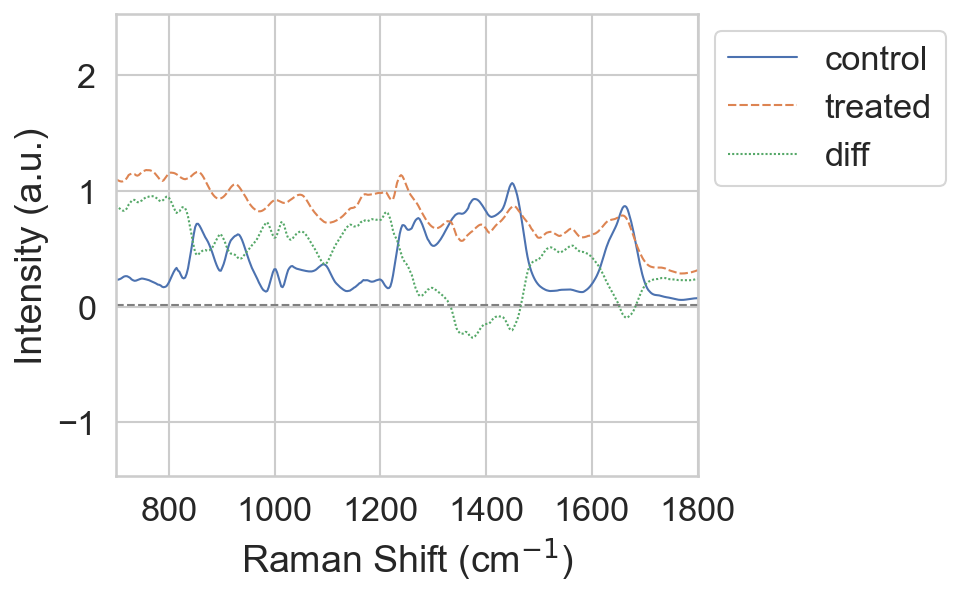

In [467]:
# Create the plot using seaborn
plt.figure(figsize=(5, 4), dpi = 150);
sns.lineplot(
    data=df_md, #_spectra, 
    x=df_md['index'].astype(float), #_spectra
    y='value', 
    hue='variable', 
    errorbar=None, 
    style='variable', 
    style_order= ['control','treated','diff'],
    hue_order=['control','treated','diff'],
    linewidth = 1
    #legend = False
);
# Set the x-axis limit
plt.xlim(700, 1800);
#plt.ylim(-.6, 3)

# Add labels and title
plt.xlabel("Raman Shift (cm$^{-1}$)");
plt.ylabel('Intensity (a.u.)');
#lt.title('Stacked Spectral Data with Continuous Y-Axis Ticks and Subgroups')
plt.legend(bbox_to_anchor = (1,1));
plt.xticks([800, 1000, 1200, 1400, 1600, 1800]);
plt.axhline(0.01, ls = '--', color = 'gray', lw = 1)

### Explore ratios between peaks of interest

In [82]:
df_sam[df_sam['variable'].between(1200, 1300)]['variable'].unique()

array([1200.67, 1201.69, 1202.72, 1203.75, 1204.77, 1205.8 , 1206.82,
       1207.85, 1208.88, 1209.9 , 1210.92, 1211.95, 1212.97, 1214.  ,
       1215.02, 1216.04, 1217.06, 1218.09, 1219.11, 1220.13, 1221.15,
       1222.17, 1223.19, 1224.21, 1225.24, 1226.26, 1227.28, 1228.3 ,
       1229.31, 1230.33, 1231.35, 1232.37, 1233.39, 1234.41, 1235.43,
       1236.44, 1237.46, 1238.48, 1239.49, 1240.51, 1241.53, 1242.54,
       1243.56, 1244.57, 1245.59, 1246.6 , 1247.62, 1248.63, 1249.64,
       1250.66, 1251.67, 1252.68, 1253.7 , 1254.71, 1255.72, 1256.73,
       1257.75, 1258.76, 1259.77, 1260.78, 1261.79, 1262.8 , 1263.81,
       1264.82, 1265.83, 1266.84, 1267.85, 1268.86, 1269.86, 1270.87,
       1271.88, 1272.89, 1273.9 , 1274.9 , 1275.91, 1276.92, 1277.92,
       1278.93, 1279.93, 1280.94, 1281.95, 1282.95, 1283.95, 1284.96,
       1285.96, 1286.97, 1287.97, 1288.97, 1289.98, 1290.98, 1291.98,
       1292.98, 1293.99, 1294.99, 1295.99, 1296.99, 1297.99, 1298.99,
       1299.99])

In [83]:
# Calculate peaks ratios for specified peaks
amide1ratio = pd.concat([dt_norm.iloc[:, :3].reset_index(), 
                         pd.DataFrame(dt_norm['1242.54']/dt_norm['1270.87'], columns = ['ratio']).reset_index()], axis=1)
#amide1ratio.rename({'0': 'ratio'}, inplace=True)
amide1ratio#.head()
#[dt_norm['Trt'] != 'Orthogonal']

,index,sample,RiboConc,Trt,index,ratio
0,0,Control,20mins,Orthogonal,0,1.494502
1,1,Control,20mins,Orthogonal,1,1.240566
2,2,Control,20mins,Orthogonal,2,1.263558
3,3,Control,20mins,Orthogonal,3,1.178507
4,4,Control,2mins,Orthogonal,4,1.160497
...,...,...,...,...,...,...
58,29,Treated,40mins,Parallel,29,1.021616
59,30,Treated,40mins,Parallel,30,1.010359
60,31,Treated,40mins,Parallel,31,1.190217
61,32,Treated,60mins,Parallel,32,1.422389


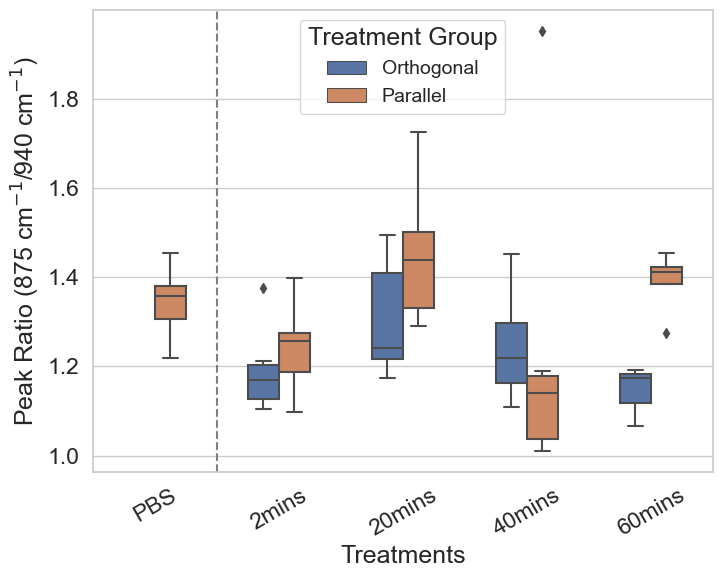

In [84]:
#Plot distribution of ratios over the expeimental period
plt.figure(figsize = (8, 6));
sns.boxplot(
    x = 'RiboConc',
    y = 'ratio',
    hue = 'Trt',
    data = amide1ratio,
    order=['PBS','2mins', '20mins', '40mins', '60mins'],#,  '32mins'],
    width=.5,
    #gap = .04,
    hue_order = ['Orthogonal', 'Parallel'],
    #palette='pastel'
    )
plt.xticks(rotation = 30);
plt.xlabel('Treatments')
plt.axvline(.5, ls = '--', color = 'gray')
plt.ylabel('Peak Ratio (875 cm$^{-1}$/940 cm$^{-1}$)')
plt.legend(title = 'Treatment Group', fontsize = 14)
#plt.ylim(0.5, .8)

In [88]:
# statistical differene of means between treament groups
tukey = pairwise_tukeyhsd(endog=amide1ratio[amide1ratio['Trt'] != 'Parallel']['ratio'],
                          groups=amide1ratio[amide1ratio['Trt'] != 'Parallel']['RiboConc'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
20mins  2mins  -0.1082  0.287 -0.2716 0.0552  False
20mins 40mins  -0.0486 0.7973 -0.1947 0.0975  False
20mins 60mins  -0.1526 0.0977 -0.3255 0.0203  False
 2mins 40mins   0.0596 0.7486 -0.1038  0.223  False
 2mins 60mins  -0.0444 0.9146 -0.2321 0.1434  False
40mins 60mins   -0.104 0.3681 -0.2769 0.0689  False
---------------------------------------------------


In [372]:
t_stat, p_val = stats.ttest_ind(
        amide1ratio[(amide1ratio['group'] == 'control')]['ratio'], 
        amide1ratio[(amide1ratio['group'] == 'treated')]['ratio'],
        #equal_var=False
        )
print(f"p-ratio ({v}): ", p_val)

p-ratio (1663):  1.0296836300094579e-14


### PCA analyses 

In [382]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler


x = dt_norm1[dt_norm1['Trt'] != 'pbs'].iloc[:, 207:607]#dt_norm.iloc[:, 207:607]#MinMaxScaler().fit_transform()
y = dt_norm1[dt_norm1['Trt'] != 'pbs'].iloc[:, :4]

pca = PCA(n_components=5)
pc = pca.fit_transform(x)
pc_df = pd.concat([y, pd.DataFrame(pc, columns = [f'PC{x}' for x in np.arange(1, 6)])], axis=1)


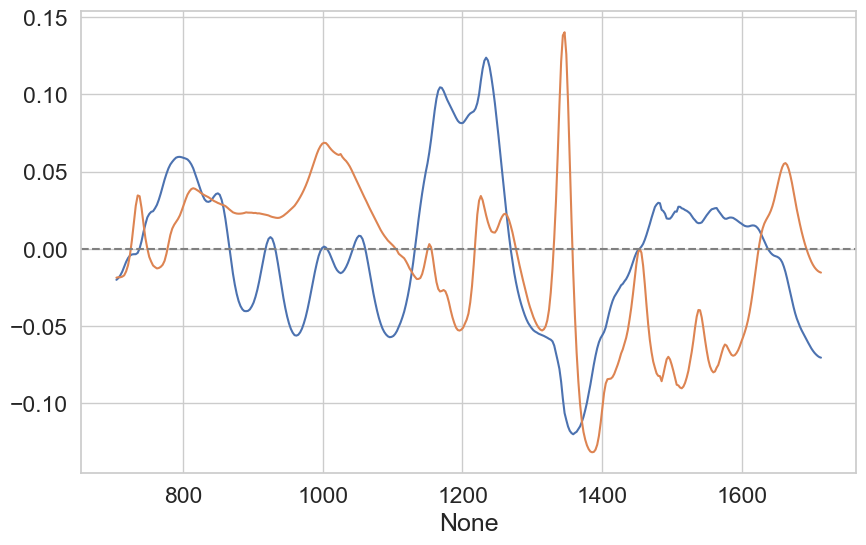

In [383]:
plt.figure(figsize = (10, 6))
sns.lineplot(y = pca.components_[1],
         x = dff.iloc[:, 207:607].columns.astype(float))
sns.lineplot(y = pca.components_[3],
         x = dff.iloc[:, 207:607].columns.astype(float))
plt.axhline(0, color = 'gray', ls = '--')

Text(0, 0.5, 'Variance Explained')

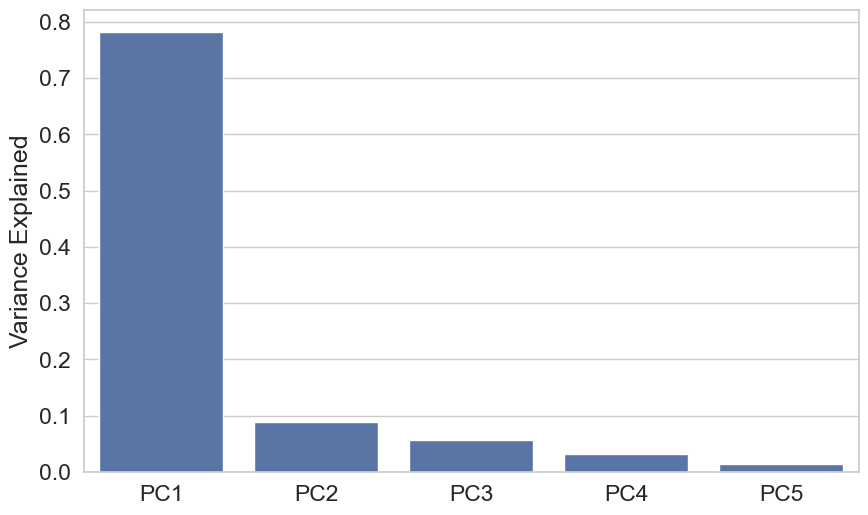

In [384]:
plt.figure(figsize = (10, 6))
sns.barplot(x = [f'PC{x}' for x in np.arange(1, 6)],
            y = pca.explained_variance_ratio_)
plt.ylabel('Variance Explained')

Text(0.5, 1.0, 'PCA Analysis of Cross Linked Mice Tail Tendon (MTT)')

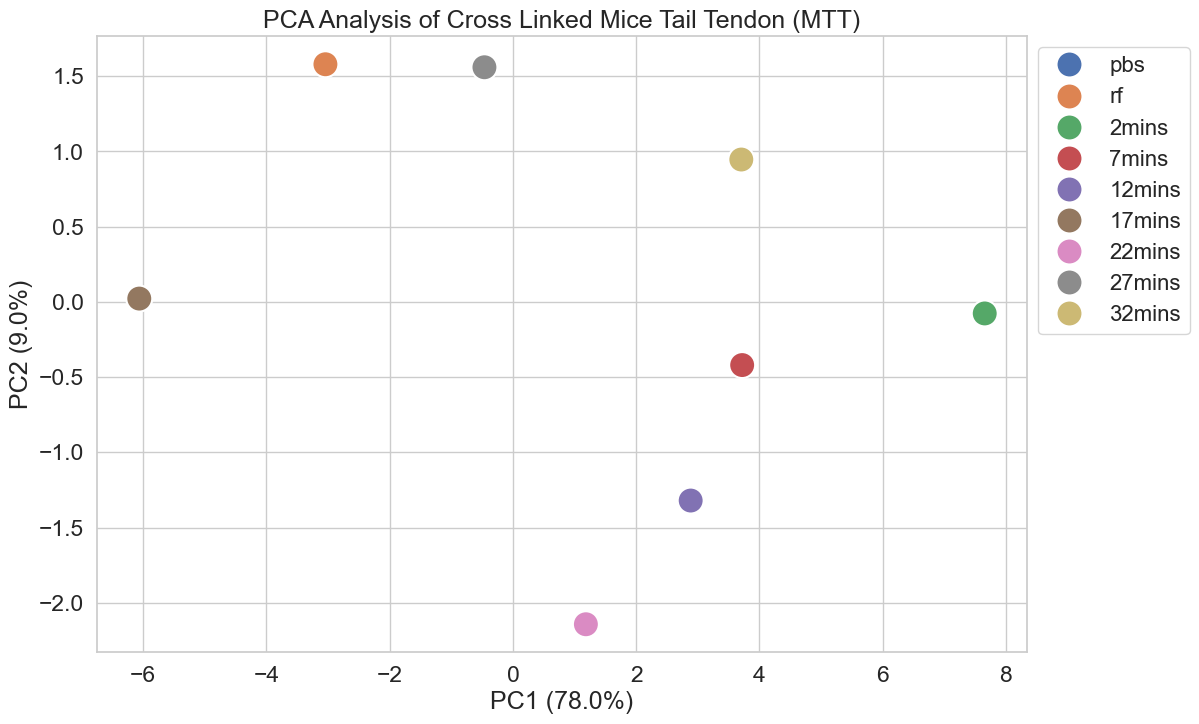

In [385]:
plt.figure(figsize = (12, 8))
sns.scatterplot(
    x = 'PC1',
    y = 'PC2',
    data = pc_df.groupby('Trt').mean(numeric_only=True),
    #[pc_df['PC1'] < 50],#pc_df[pc_df['PC1'] < 50].groupby(['RiboConc', 'Trt']).median().reset_index(), #
    hue = 'Trt',
    hue_order=['pbs', 'rf', '2mins', '7mins','12mins', '17mins', '22mins', '27mins',
        '32mins'],
    #style = 'Trt',
    s = 350
)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0].round(2) * 100}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1].round(2) * 100}%)')
plt.legend(bbox_to_anchor = (1, 1), fontsize = 16)
plt.title('PCA Analysis of Cross Linked Mice Tail Tendon (MTT)')

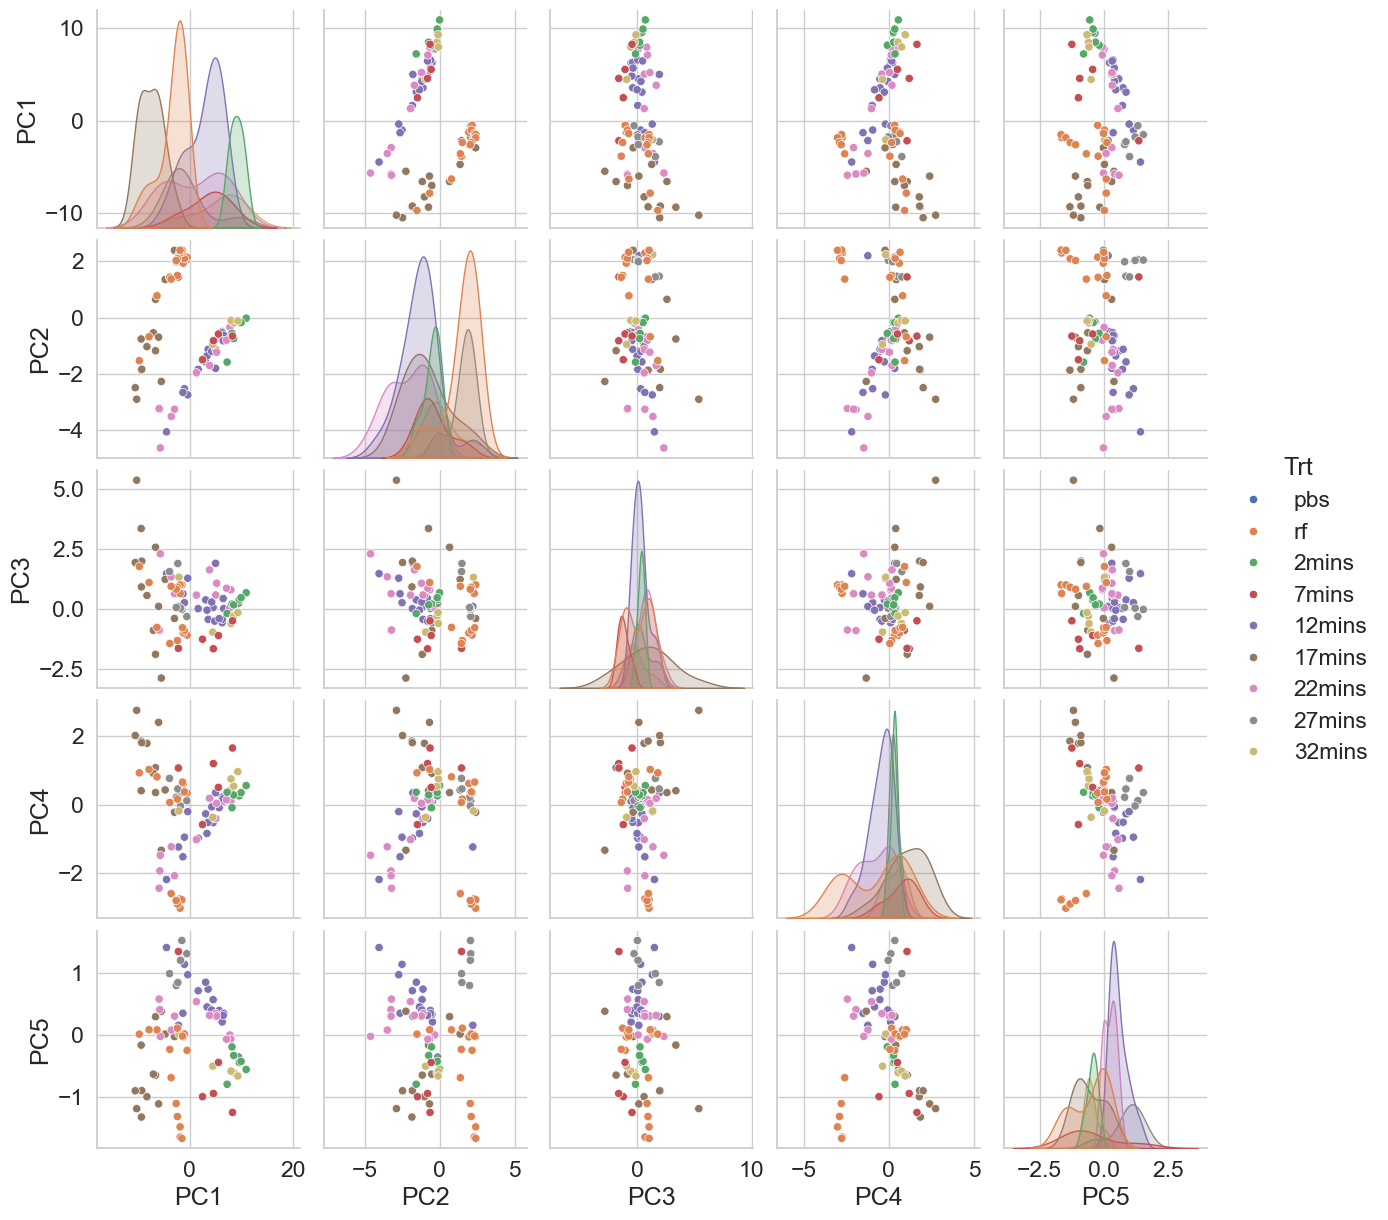

In [386]:
sns.pairplot(pc_df[pc_df['PC2'] < 2.5],
             hue = 'Trt',
    hue_order=['pbs', 'rf', '2mins', '7mins','12mins', '17mins', '22mins', '27mins',
        '32mins']
        );

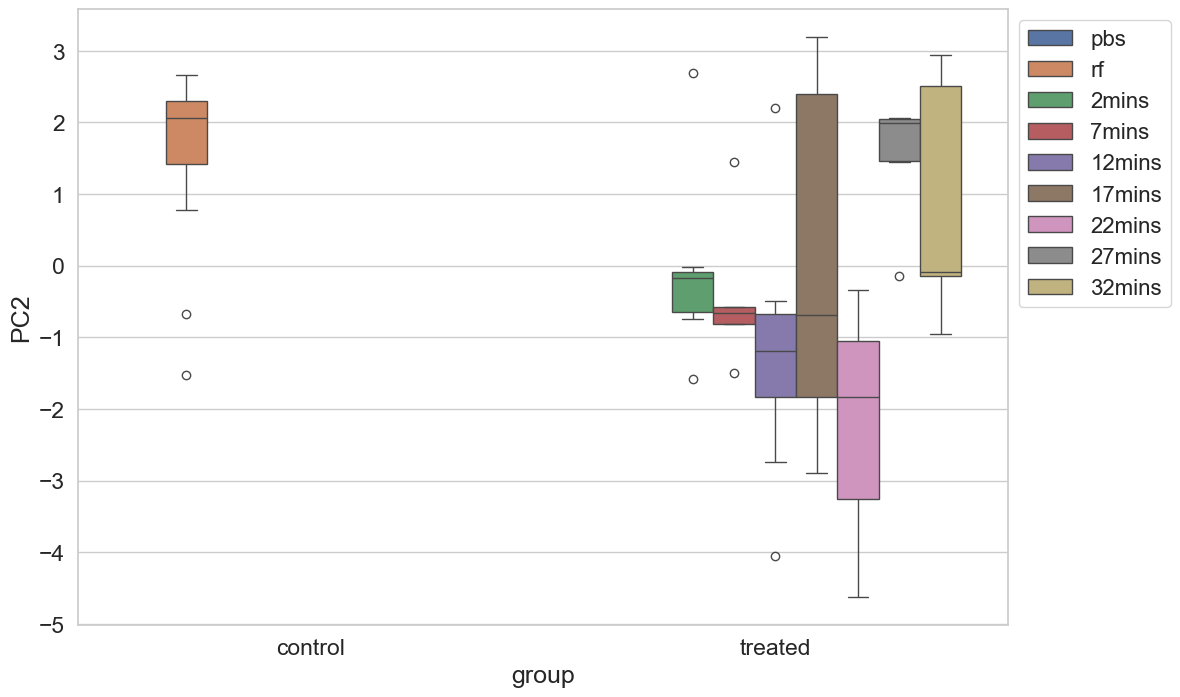

In [389]:
plt.figure(figsize = (12, 8))
sns.boxplot(
    x = 'group',
    y = 'PC2',
    hue = 'Trt',
    hue_order=['pbs', 'rf', '2mins', '7mins','12mins', '17mins', '22mins', '27mins', '32mins'],
    data = pc_df,
    order = ['control', 'treated']
    #[pc_df['PC3'] >-10]#[(pc_df['PC1'] < 10) & (df_sam['Trt'].isin(['P_Rinsed', 'P', 'P_Unrinsed']))]
)
#NP_Rinsed, , 'NP_Unrinsed'
plt.legend(bbox_to_anchor = (1, 1), fontsize = 16)

In [32]:
#Test of Normal Distribution
for x in df_auc['RiboConc'].unique():
    for y in df_auc['Trt'].unique():
        print(x, y)
        stat, p = sst.shapiro(df_auc[(df_auc['RiboConc'] == x) & (df_auc['Trt'] == y)]['1402.2'])
        if p > 0.05:
            print('Distribution not normal')
        else:
            print('Normal Distribution')

Ribo0.5 post2
Distribution not normal
Ribo0.5 post3
Distribution not normal
Ribo0.5 post1
Distribution not normal
Ribo0.5 pre
Distribution not normal
Ribo1 post2
Distribution not normal
Ribo1 post3
Distribution not normal
Ribo1 post1
Distribution not normal
Ribo1 pre
Distribution not normal


In [9]:
#ANOVA to test differences between group means
model = ols('value ~ RiboConc + Trt + RiboConc:Trt', df_sam).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
print(anova_table)

                    sum_sq       df             F        PR(>F)
RiboConc      1.662463e+08      1.0  32005.337771  0.000000e+00
Trt           1.898583e+06      3.0    121.836910  9.592241e-79
RiboConc:Trt  8.489261e+06      3.0    544.777481  0.000000e+00
Residual      4.474603e+08  86144.0           NaN           NaN


In [33]:
# Across group t-test
tukey_dfs = []
for x in df_auc['RiboConc'].unique():
    tukey = pairwise_tukeyhsd(endog=df_auc[df_auc['RiboConc'] == x]['1402.2'],
                          groups=df_auc[df_auc['RiboConc'] == x]['Trt'],
                          alpha=0.05)
    print(x)
    print(tukey)
    #print(pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0]))
    print('********************************************')
    tukey_dfs.append(pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0]))

Ribo0.5
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 post1  post2  -9.1074 0.5529 -27.5326   9.3178  False
 post1  post3  56.7997    0.0  38.3745  75.2249   True
 post1    pre  -1.9311 0.9921 -20.3563  16.4941  False
 post2  post3  65.9071    0.0  47.4819  84.3323   True
 post2    pre   7.1763 0.7249 -11.2489  25.6015  False
 post3    pre -58.7308    0.0  -77.156 -40.3056   True
------------------------------------------------------
********************************************
Ribo1
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
 post1  post2 -32.3699 0.7857 -125.0513  60.3115  False
 post1  post3 -44.6226 0.5742 -137.3041  48.0588  False
 post1    pre -23.6201 0.9029 -116.3015  69.0613  False
 post2  post3 -12.2527 0.9845 -104.9342  80.4287  False

In [398]:
tukey_dfs[0]

,group1,group2,meandiff,p-adj,lower,upper,reject
0,post1,post2,-1601.3240,0.6067,-5067.6369,1864.9890,False
1,post1,post3,13091.0733,0.0000,9624.7604,16557.3863,True
2,post1,pre,-262.9424,0.9970,-3729.2554,3203.3705,False
3,post2,post3,14692.3973,0.0000,11226.0843,18158.7102,True
4,post2,pre,1338.3815,0.7301,-2127.9314,4804.6945,False
5,post3,pre,-13354.0158,0.0000,-16820.3287,-9887.7028,True


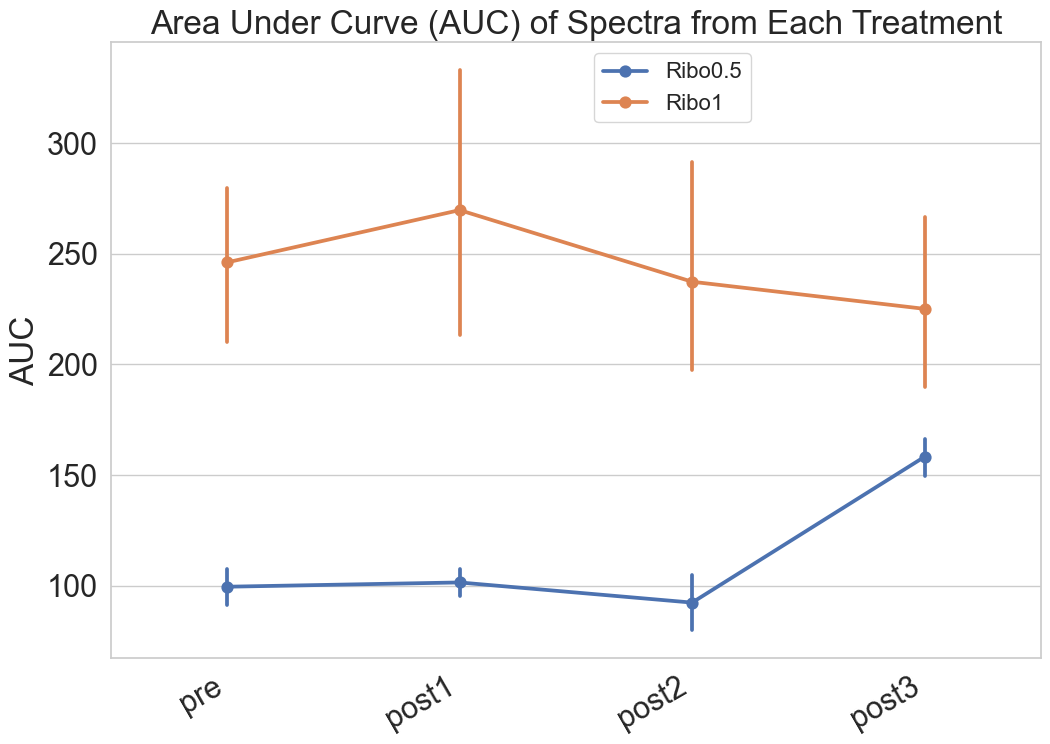

In [34]:
plt.figure(figsize = (12, 8));
sns.pointplot(
    data = df_auc,
    x = 'Trt',
    y = '1402.2',
    hue = 'RiboConc',
    #hue_order=['pre','post1','post2', 'post3']
    order= ['pre','post1','post2', 'post3'],
              );
plt.xticks(rotation = 30, ha = 'right');
plt.xlabel('');
plt.ylabel('AUC')
plt.title('Area Under Curve (AUC) of Spectra from Each Treatment');
plt.legend(fontsize = 16, bbox_to_anchor = (.7, 1));

In [374]:
dfm = dt_norm.groupby(['RiboConc', 'pre/post']).mean(numeric_only=True).reset_index()
dfm

,RiboConc,pre/post,219.694,222.708,225.721,228.732,231.743,234.751,237.758,240.763,...,2560.69,2562.61,2564.52,2566.44,2568.36,2570.27,2572.18,2574.1,2576.01,2577.92
0,Ribo0.5,post,0.143181,0.121509,0.102797,0.086361,0.072693,0.061603,0.052288,0.044915,...,0.004375,0.004380,0.004001,0.003847,0.003668,0.003405,0.002286,0.001167,0.000494,-0.000307
1,Ribo0.5,pre,0.093481,0.072354,0.055751,0.041378,0.032330,0.024496,0.017483,0.012662,...,0.001982,0.002419,0.002756,0.002375,0.002244,0.001877,0.001588,0.001378,0.001654,0.000784
2,Ribo1,post,0.696855,0.660384,0.625499,0.592905,0.562351,0.533264,0.505601,0.479531,...,0.217250,0.218314,0.219204,0.220020,0.220827,0.221568,0.222583,0.223451,0.224478,0.225148
3,Ribo1,pre,0.704311,0.671063,0.640527,0.612315,0.585241,0.559023,0.533998,0.509437,...,0.357509,0.358943,0.360377,0.361634,0.362691,0.364004,0.365464,0.367117,0.368726,0.369176


In [375]:
drt = pd.concat([pd.DataFrame(dfm[dfm['RiboConc'].str.contains('0.5')].iloc[0, 3:] - dfm[dfm['RiboConc'].str.contains('0.5')].iloc[1, 3:]).T, 
           pd.DataFrame(dfm[dfm['RiboConc'].str.contains('1')].iloc[0, 3:] - dfm[dfm['RiboConc'].str.contains('1')].iloc[1, 3:]).T])#.insert(0, 'RiboConc', ['Ribo0.5', 'Ribo1'])

In [376]:
drt.insert(0, 'RiboConc', ['Ribo0.5', 'Ribo1'])

In [377]:
drt = drt.melt(id_vars = 'RiboConc')
drt[['variable', 'value']] = drt[['variable', 'value']].astype(float)
drt

,RiboConc,variable,value
0,Ribo0.5,222.708,0.049155
1,Ribo1,222.708,-0.010678
2,Ribo0.5,225.721,0.047046
3,Ribo1,225.721,-0.015028
4,Ribo0.5,228.732,0.044983
...,...,...,...
1951,Ribo1,2574.100,-0.143667
1952,Ribo0.5,2576.010,-0.001160
1953,Ribo1,2576.010,-0.144248
1954,Ribo0.5,2577.920,-0.001091


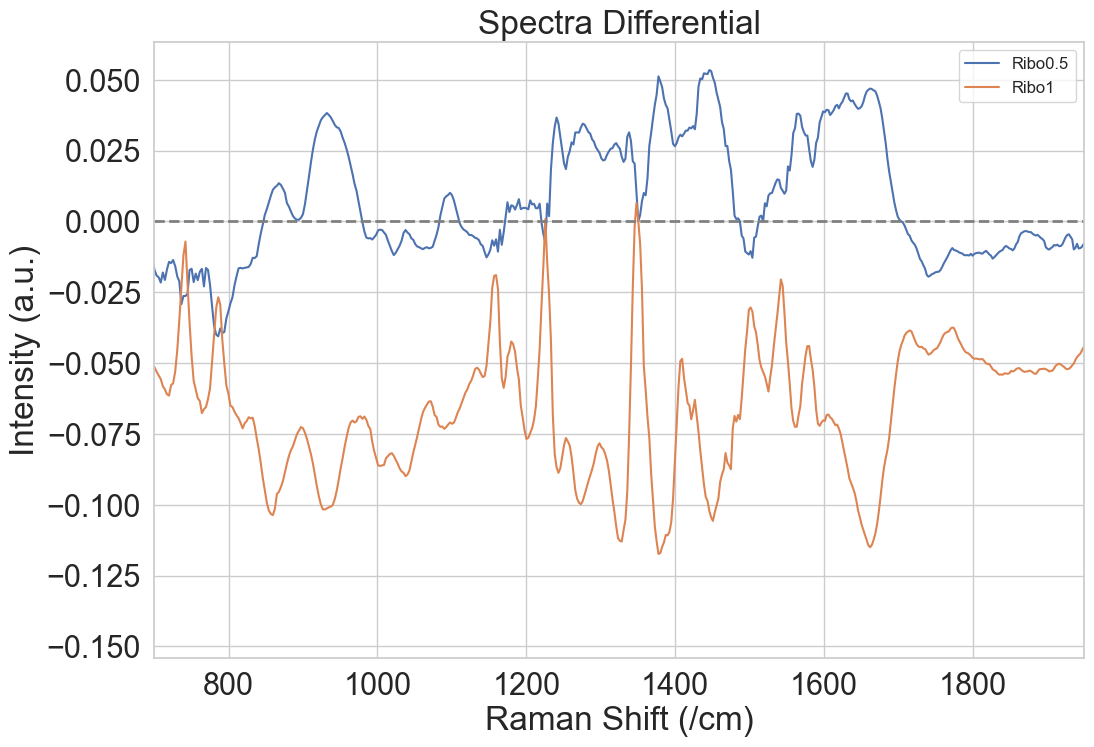

In [378]:
plt.figure(figsize = (12, 8))
sns.lineplot(
        data = drt,
        x = 'variable',
        y = 'value',
        hue = 'RiboConc',
        #hue_order=['pre','post1','post2', 'post3']
        #style='Trt'
        );
plt.title('Spectra Differential')
#plt.ylim(-.01, 1.1)
plt.xlim(700, 1950)
plt.ylabel('Intensity (a.u.)')
plt.xlabel('Raman Shift (/cm)')
plt.legend(fontsize = 12)
plt.axhline(0, ls = '--', color = 'gray', lw=2)

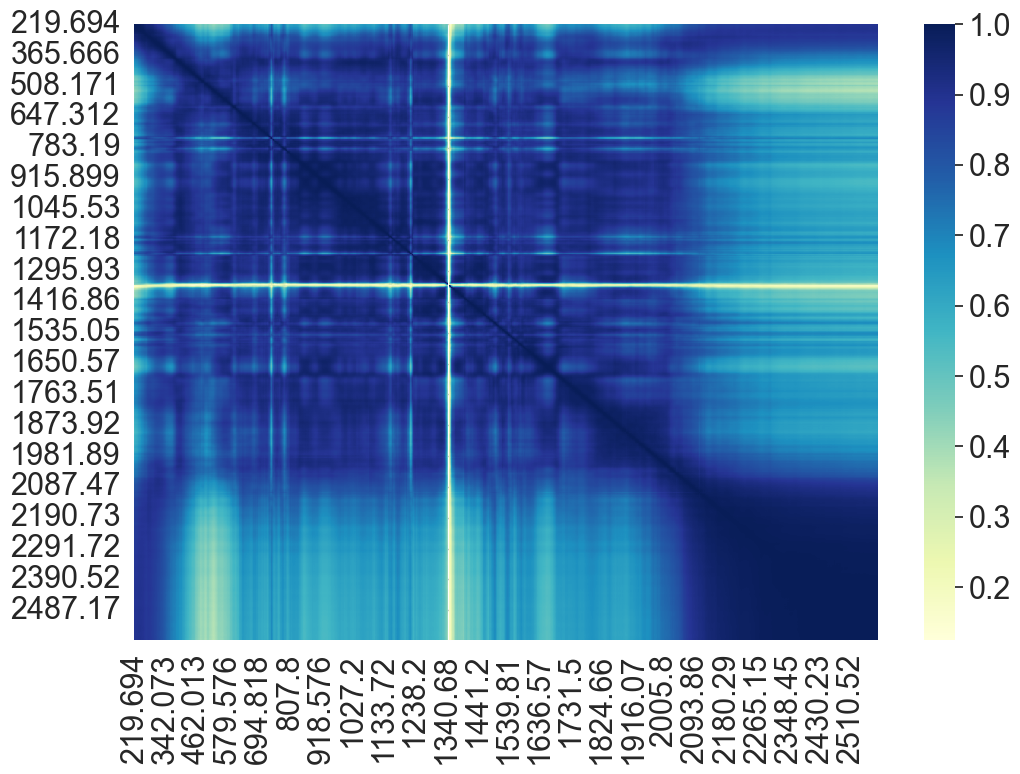

In [381]:
plt.figure(figsize = (12, 8))
sns.heatmap(dt_norm.corr(numeric_only=True),
             cmap='YlGnBu',
             #vmin=-1, vmax=1
             );

In [162]:
df_mag = dt.groupby('sample').mean().reset_index().melt(id_vars=['sample', 'spectra_num'])
df_mag[["variable", "value"]] = df_mag[["variable", "value"]].astype(float)

In [163]:
df_mag[df_mag['sample'] == 'Micetail_Ribo0.5_post']

,sample,spectra_num,variable,value
0,Micetail_Ribo0.5_post,3.0,776.251,-35.687438
4,Micetail_Ribo0.5_post,3.0,777.424,-31.513148
8,Micetail_Ribo0.5_post,3.0,778.596,-35.736820
12,Micetail_Ribo0.5_post,3.0,779.769,-16.109186
16,Micetail_Ribo0.5_post,3.0,780.939,8.906660
...,...,...,...,...
4076,Micetail_Ribo0.5_post,3.0,1877.880,12.054450
4080,Micetail_Ribo0.5_post,3.0,1878.870,9.352970
4084,Micetail_Ribo0.5_post,3.0,1879.870,7.459466
4088,Micetail_Ribo0.5_post,3.0,1880.860,6.406022


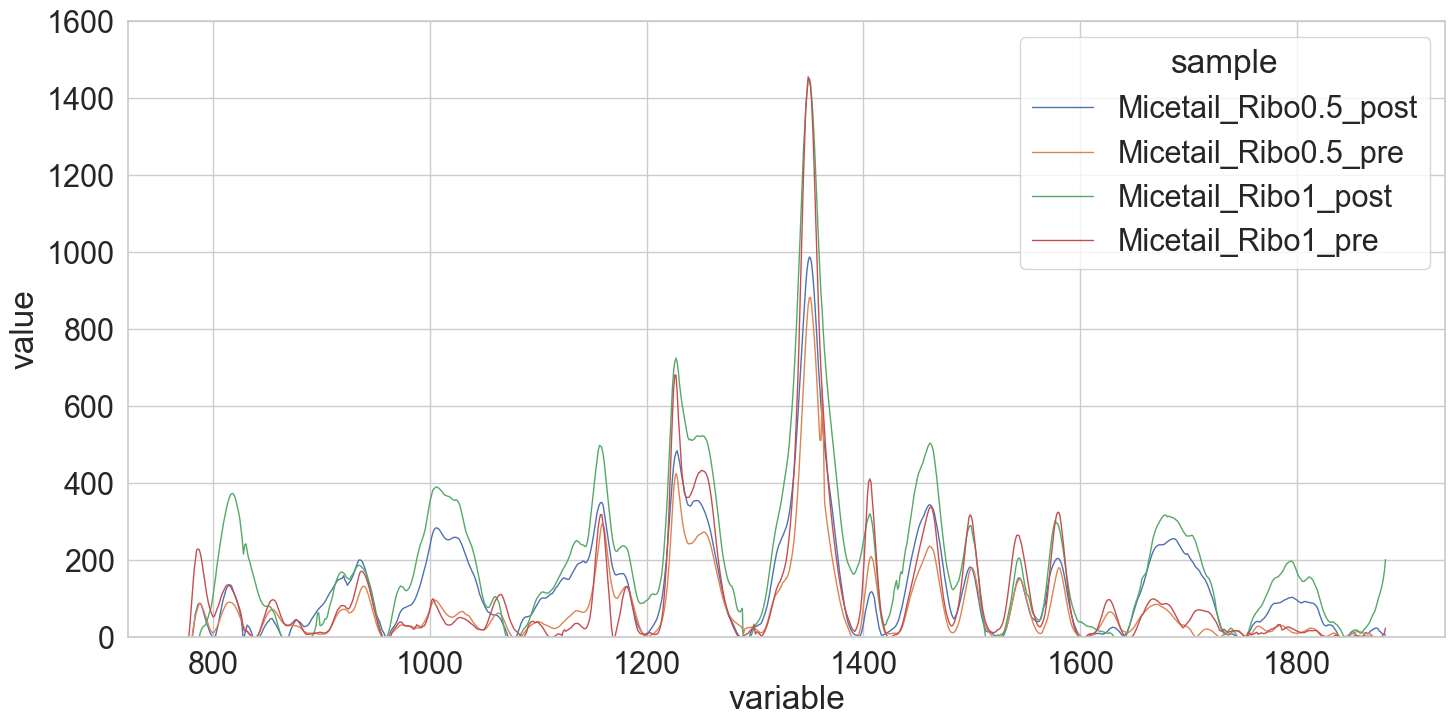

In [164]:
plt.figure(figsize = (17, 8))
sns.lineplot(
    data = df_mag,
    x = 'variable',
    y = 'value',
    hue = 'sample',
    lw = 1,

    );
plt.ylim(0, 1600);

In [165]:
df_mag[df_mag['sample'].str.contains('pre')]

,sample,spectra_num,variable,value
1,Micetail_Ribo0.5_pre,3.0,776.251,-90.164672
3,Micetail_Ribo1_pre,3.0,776.251,-19.945447
5,Micetail_Ribo0.5_pre,3.0,777.424,-63.314144
7,Micetail_Ribo1_pre,3.0,777.424,6.797188
9,Micetail_Ribo0.5_pre,3.0,778.596,-35.733060
...,...,...,...,...
4087,Micetail_Ribo1_pre,3.0,1879.870,7.235869
4089,Micetail_Ribo0.5_pre,3.0,1880.860,-31.766186
4091,Micetail_Ribo1_pre,3.0,1880.860,10.562074
4093,Micetail_Ribo0.5_pre,3.0,1881.860,-36.633198


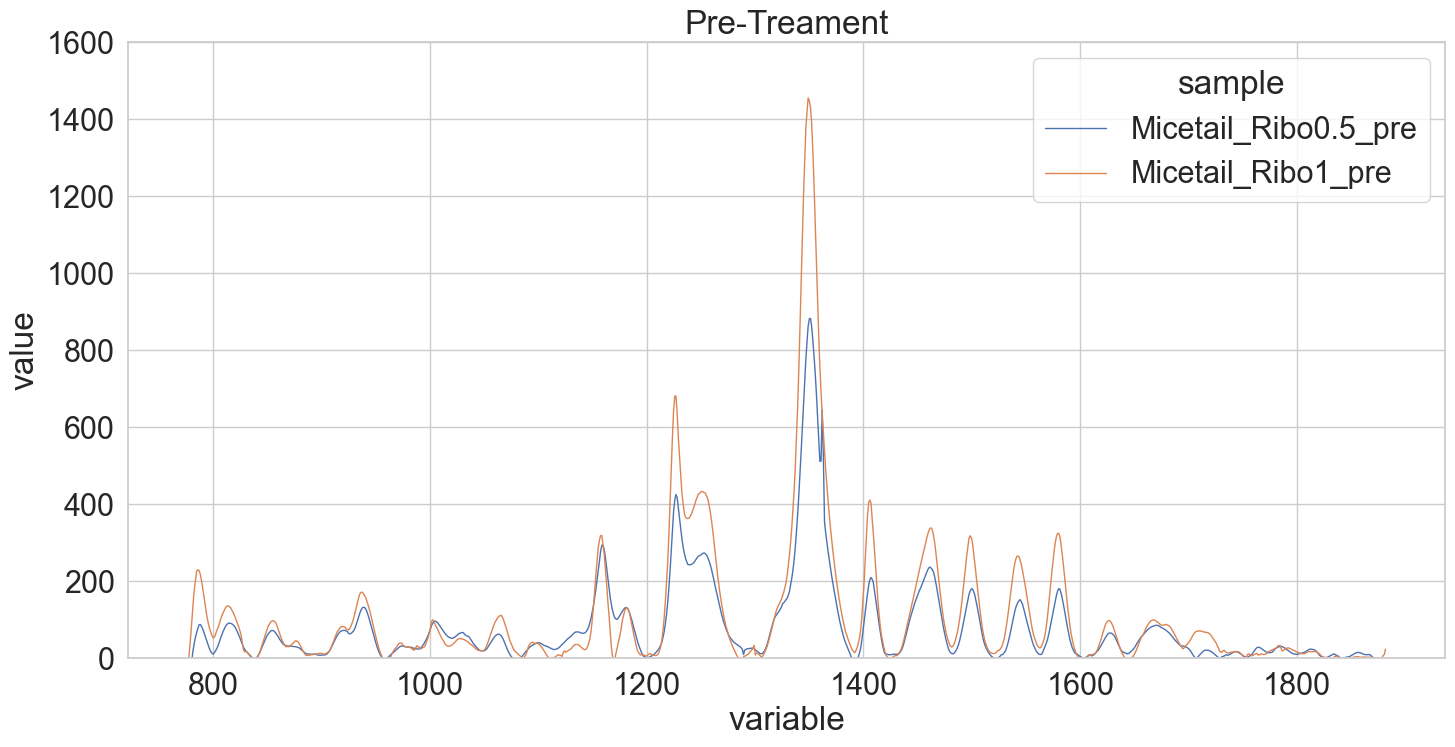

In [166]:
plt.figure(figsize = (17, 8))
sns.lineplot(
    data = df_mag[df_mag['sample'].str.contains('pre')],
    x = 'variable',
    y = 'value',
    hue = 'sample',
    lw = 1,

    );
plt.ylim(0, 1600);
plt.title('Pre-Treament');

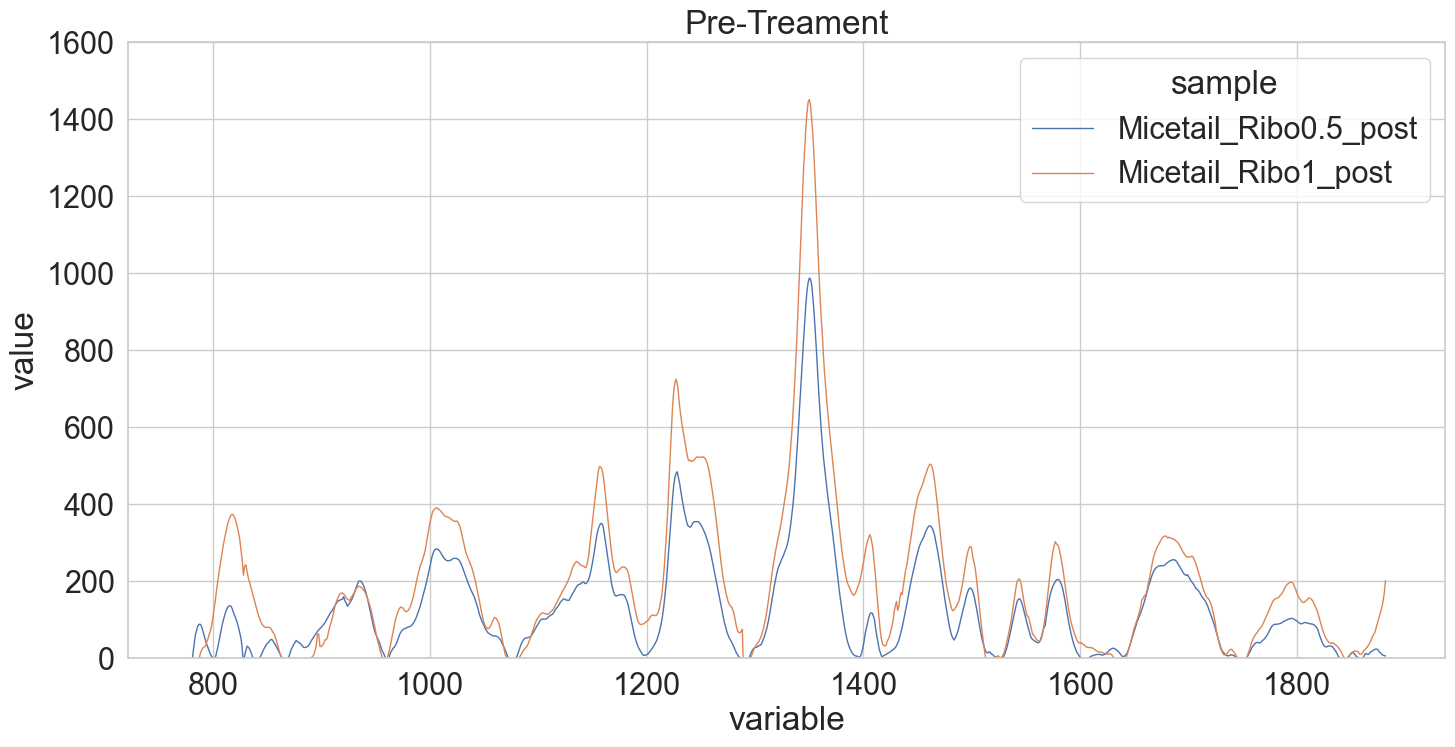

In [167]:
plt.figure(figsize = (17, 8))
sns.lineplot(
    data = df_mag[df_mag['sample'].str.contains('post')],
    x = 'variable',
    y = 'value',
    hue = 'sample',
    lw = 1,

    );
plt.ylim(0, 1600);
plt.title('Pre-Treament');

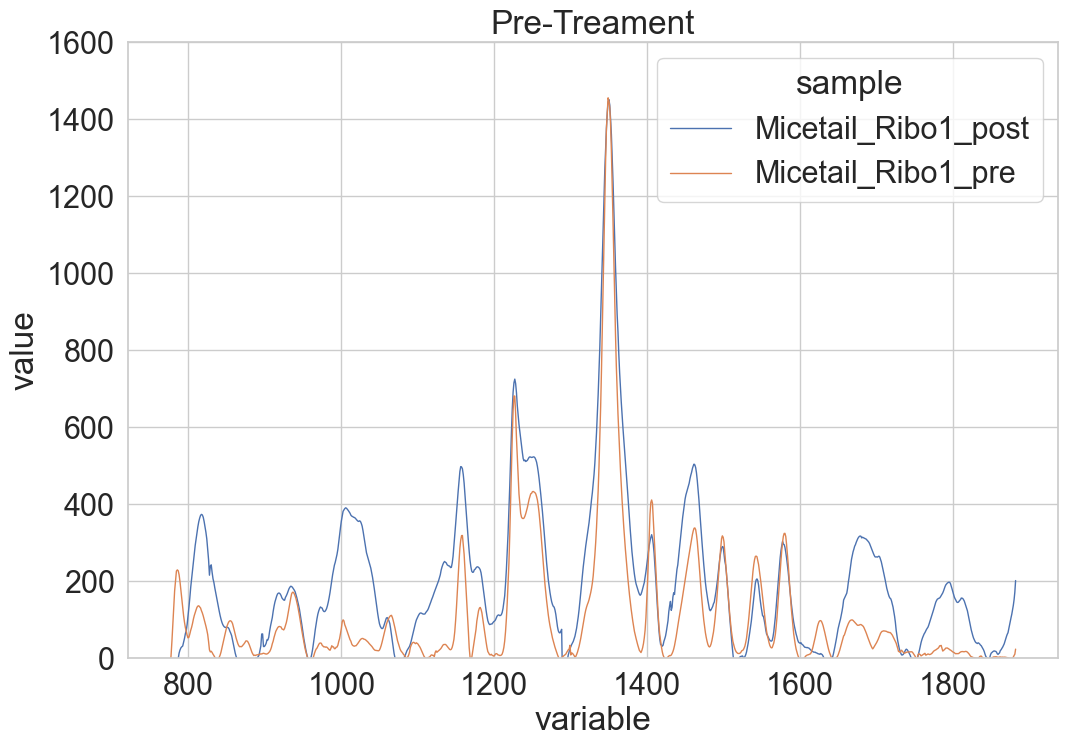

In [168]:
plt.figure(figsize = (12, 8))
sns.lineplot(
    data = df_mag[df_mag['sample'].str.contains('Ribo1')],
    x = 'variable',
    y = 'value',
    hue = 'sample',
    lw = 1,

    );
plt.ylim(0, 1600);
plt.title('Pre-Treament');

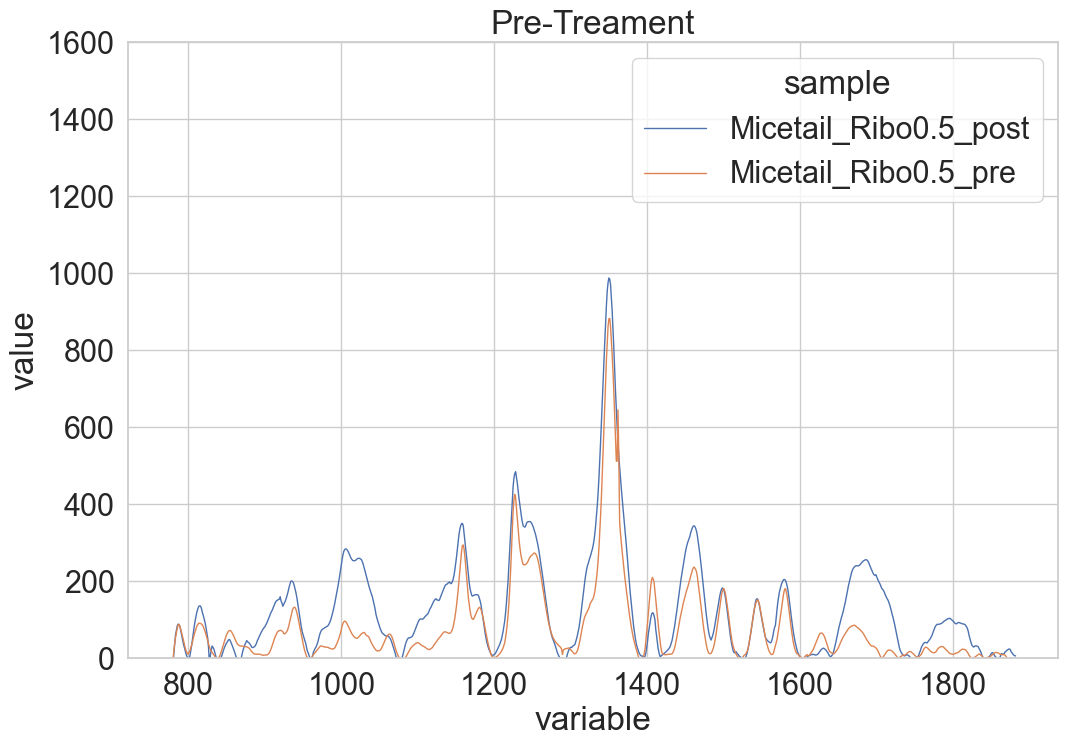

In [169]:
plt.figure(figsize = (12, 8))
sns.lineplot(
    data = df_mag[df_mag['sample'].str.contains('Ribo0.5')],
    x = 'variable',
    y = 'value',
    hue = 'sample',
    lw = 1,

    );
plt.ylim(0, 1600);
plt.title('Pre-Treament');

In [225]:
dtm = dt_norm.groupby(['sample']).mean().reset_index()
dtm

,sample,spectra_num,776.251,777.424,778.596,779.769,780.939,782.111,783.283,784.455,...,1872.89,1873.89,1874.89,1875.88,1876.88,1877.88,1878.87,1879.87,1880.86,1881.86
0,Micetail_Ribo0.5_post,3.00,-0.034324,-0.031131,-0.035633,-0.016109,0.009355,0.033810,0.062647,0.074306,...,0.023956,0.023545,0.022389,0.017051,0.014773,0.012043,0.009328,0.007547,0.006585,0.006454
1,Micetail_Ribo0.5_pre,3.00,-0.104190,-0.073590,-0.042074,-0.010500,0.017917,0.041148,0.059775,0.075036,...,-0.006993,-0.009472,-0.012732,-0.016297,-0.019122,-0.022716,-0.026824,-0.031097,-0.037068,-0.042781
2,Micetail_Ribo1_post,2.75,-0.311310,-0.287669,-0.249781,-0.196015,-0.153095,-0.114427,-0.076990,-0.045150,...,0.052423,0.060328,0.068227,0.075509,0.082592,0.090911,0.100284,0.111598,0.126320,0.147335
3,Micetail_Ribo1_pre,3.00,-0.008918,0.009264,0.035154,0.064712,0.095543,0.124300,0.142170,0.159737,...,0.000447,0.000179,-0.000013,-0.000287,0.000113,0.000768,0.002075,0.005015,0.007192,0.015987


In [226]:
spec_5 = (dtm[dtm['sample'].str.contains('0.5')].iloc[0, 2:]) - (dtm[dtm['sample'].str.contains('0.5')].iloc[1, 2:])

In [234]:
spec_1 = dtm[dtm['sample'].str.contains('1')].iloc[0, 2:] - (dtm[dtm['sample'].str.contains('1')].iloc[1, 2:])

In [235]:
dt_sub = pd.concat([pd.DataFrame(spec_5).T, pd.DataFrame(spec_1).T])#.insert(0, 'sample', ['Riboflavin_0.5', 'Riboflavin_1'])
dt_sub

,776.251,777.424,778.596,779.769,780.939,782.111,783.283,784.455,785.625,786.796,...,1872.89,1873.89,1874.89,1875.88,1876.88,1877.88,1878.87,1879.87,1880.86,1881.86
0,0.069867,0.042459,0.00644,-0.005609,-0.008562,-0.007338,0.002872,-0.000731,-0.001304,-0.007458,...,0.03095,0.033017,0.035121,0.033347,0.033894,0.034759,0.036153,0.038644,0.043653,0.049236
0,-0.302392,-0.296933,-0.284934,-0.260727,-0.248638,-0.238727,-0.21916,-0.204887,-0.184925,-0.168324,...,0.051976,0.060149,0.068241,0.075796,0.082479,0.090143,0.098209,0.106583,0.119128,0.131348


In [236]:
dt_sub.insert(0, 'sample', ['Riboflavin_0.5', 'Riboflavin_1'])

In [237]:
dt_sub

,sample,776.251,777.424,778.596,779.769,780.939,782.111,783.283,784.455,785.625,...,1872.89,1873.89,1874.89,1875.88,1876.88,1877.88,1878.87,1879.87,1880.86,1881.86
0,Riboflavin_0.5,0.069867,0.042459,0.00644,-0.005609,-0.008562,-0.007338,0.002872,-0.000731,-0.001304,...,0.03095,0.033017,0.035121,0.033347,0.033894,0.034759,0.036153,0.038644,0.043653,0.049236
0,Riboflavin_1,-0.302392,-0.296933,-0.284934,-0.260727,-0.248638,-0.238727,-0.21916,-0.204887,-0.184925,...,0.051976,0.060149,0.068241,0.075796,0.082479,0.090143,0.098209,0.106583,0.119128,0.131348


In [238]:
sub_m = dt_sub.melt(['sample'])
sub_m[['variable', 'value']] = sub_m[['variable', 'value']].astype(float)

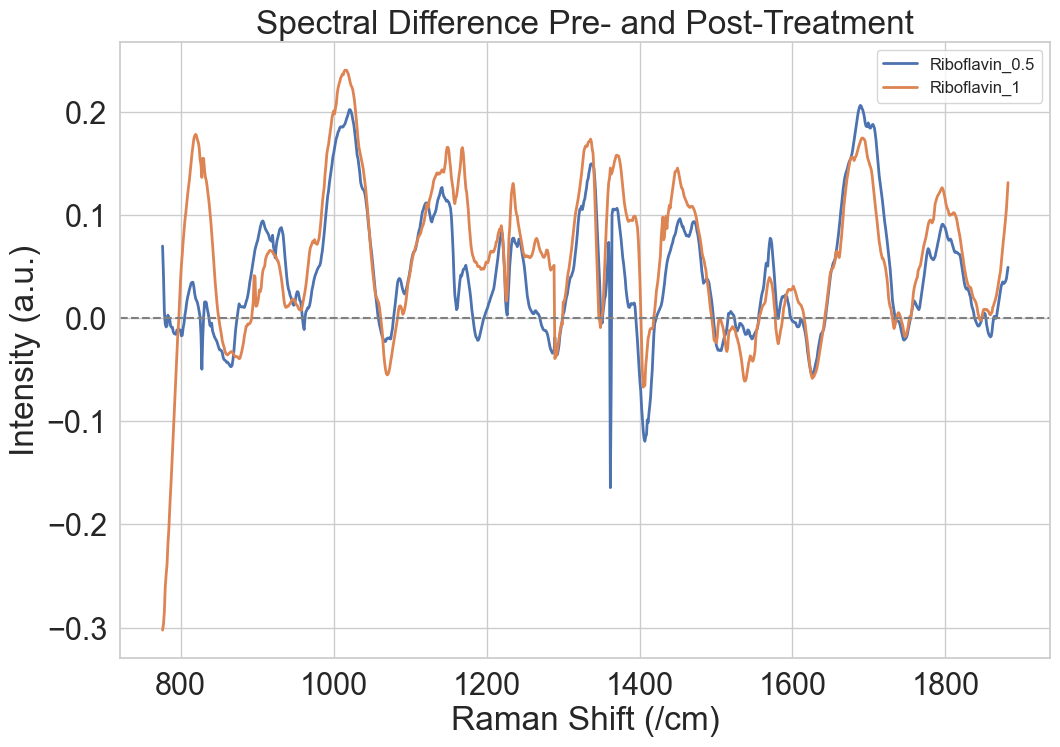

In [239]:
plt.figure(figsize = (12, 8))
sns.lineplot(
    data = sub_m,
    x = 'variable',
    y = 'value',
    hue = 'sample',
    lw = 2,

    );
plt.title('Spectral Difference Pre- and Post-Treatment')
plt.ylabel('Intensity (a.u.)')
plt.xlabel('Raman Shift (/cm)')
plt.legend(fontsize = 12)
plt.axhline(0, color = 'gray', ls = '--')